# Curva Normal
uma Distribui√ß√£o normal  √© uma distribui√ß√£o de probabilidade de uma variavel aleatoria X, cujo o gr√°fico √© chamado de curva normal.
Onde:
- M√©dia = Mediana = Moda
- Distribui√ß√£o √© sim√©trica
- Area √© igual a 1
- A area distante nunca toca o eixo x

<img src="https://www.inf.ufsc.br/~andre.zibetti/probabilidade/figures/normal.PNG" alt="curva Normal" width="70%">



## Prorpiedades de uma Distribui√ß√£o normal

### Fun√ß√£o Densidade de Probabilidade (FDP)

Necessita de dois ponto para ser usada:
- Area da curva igual a 1
- A fun√ß√£o ser positiva

<img src="https://geokrigagem.com.br/wp-content/uploads/2021/09/image-14-1024x131.png" alt="fdp formula" width="70%">

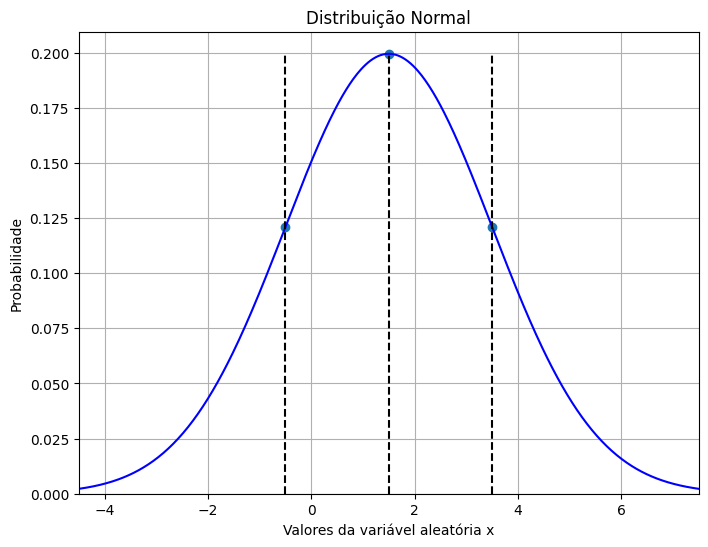

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cria√ß√£o de uma distribui√ß√£o normal com m√©dia 1.5 e desvio padr√£o 2.0
media, desvpad = 1.5, 2.0
distnorm = stats.norm(media, desvpad)
### Representa√ß√£o gr√°fica
# Gera√ß√£o de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 500, media-3*desvpad, media+3*desvpad
x = np.linspace(INICIO, FIM, QUANT)
y = distnorm.pdf(x)
# Gr√°fico
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b')
plt.xlim(INICIO, FIM)
plt.ylim(0, distnorm.pdf(media)+0.01)
#fru fru para adicionar
plt.title('Distribui√ß√£o Normal')
plt.xlabel('Valores da vari√°vel aleat√≥ria x')
plt.ylabel('Probabilidade')
plt.scatter([media - desvpad, media, media + desvpad],
            [distnorm.pdf(media-desvpad), distnorm.pdf(media), distnorm.pdf(media+desvpad)])
plt.vlines([media- desvpad, media, media + desvpad], 0, distnorm.pdf(media),
           colors='k', linestyles='dashed')
plt.grid()
plt.show()

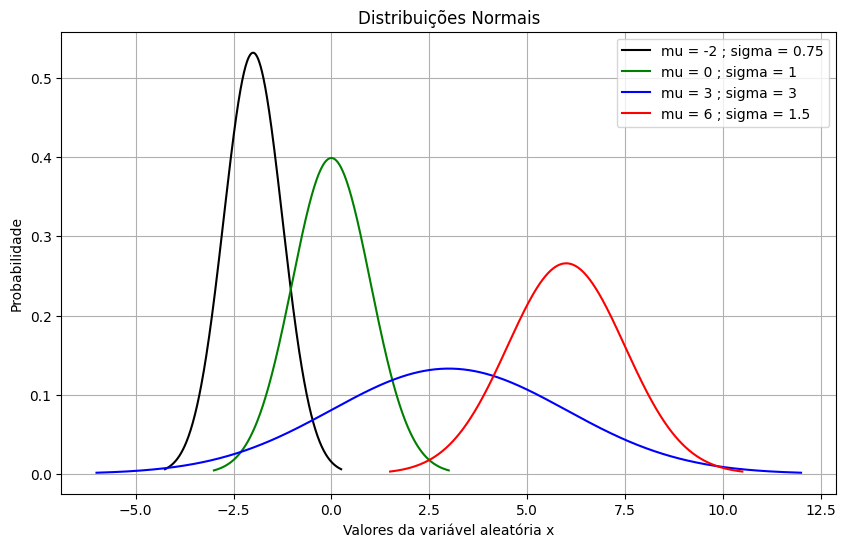

In [3]:
## Plotando v√°rias distribui√ß√µes normais
# M√©dias e desvios padr√£o
medias = [-2, 0, 3, 6]
desvios = [0.75, 1, 3, 1.5]
# Cores das curvas
cores = ['k', 'g', 'b', 'r']
# Tamanho da figura
plt.figure(figsize=(10, 6))
# Plotagem dos gr√°ficos
for mu, std, cor in zip(medias, desvios, cores):
  normal = stats.norm(mu, std)
  QUANT, INICIO, FIM = 500, mu-3*std, mu+3*std
  x = np.linspace(INICIO, FIM, QUANT)
  y = normal.pdf(x)
  plt.plot(x, y, cor)
# Atributos do gr√°fico
plt.title('Distribui√ß√µes Normais')
plt.xlabel('Valores da vari√°vel aleat√≥ria x')
plt.ylabel('Probabilidade')
plt.legend(['mu = -2 ; sigma = 0.75',
            'mu = 0 ; sigma = 1',
            'mu = 3 ; sigma = 3',
            'mu = 6 ; sigma = 1.5'])
plt.grid(True)
plt.show()

## Fun√ß√£o de distribui√ß√£o acumulativa (fdc) e Fun√ß√£o de sobreviv√™ncia (fs)

O comando cdf (fdc) server para achar a porcentagem a esquerda de uma distribui√ß√£o normal

O comando sf (fs) serve para achar a porcentagem a direita de uma distribui√ß√£o normal

In [4]:
# Defini√ß√£o da distribui√ß√£o normal padr√£o
media, std = 0, 1
normpad = stats.norm(media, std)
# √Årea acumulada que corresponde a um escore-z de ‚Äì2,19
area1 = normpad.cdf(-2.19)
print(f'A √°rea acumulada correspondente a z = -2.19 √© {area1:.4f}.')
# √Årea acumulada que corresponde a um escore-z de 2,17
area2 = normpad.cdf(2.17)
print(f'A √°rea acumulada correspondente a z = 2.17 √© {area2:.4f}.')
# √Årea sob a curva normal padr√£o √† direita de z = 1,06
area3 = normpad.sf(1.06) # Isso equivale a area3 = 1 - normpad.cdf(1.06)
print(f'A √°rea sob a curva normal √† direita de z = 1.06 √© {area3:.4f}.')
# √Årea sob a curva normal padr√£o entre z = ‚Äì1,5 e z = 1,25
area4 = normpad.cdf(1.25) - normpad.cdf(-1.5)
print(f'A √°rea sob a curva normal entre z = -1.5 e z = 1.25 √© {area4:.4f}.')

A √°rea acumulada correspondente a z = -2.19 √© 0.0143.
A √°rea acumulada correspondente a z = 2.17 √© 0.9850.
A √°rea sob a curva normal √† direita de z = 1.06 √© 0.1446.
A √°rea sob a curva normal entre z = -1.5 e z = 1.25 √© 0.8275.


Exercicio resolvido usando sf e criando tabela apenas com media e desvio padr√£o

**Exerc√≠cio:** A velocidade m√©dia dos ve√≠culos que passam em um trecho de uma rodovia √© 67 milhas por hora, com desvio padr√£o de 3,5 milhas por hora.

Um ve√≠culo √© selecionado de forma aleat√≥ria. Qual √© a probabilidade de que ele esteja ultrapassando o limite de velocidade de 70 milhas por hora? Suponha que as velocidades s√£o normalmente distribu√≠das.


In [5]:
media, std = 67, 3.5
LIMITE = 70
velocidades = stats.norm(loc=media, scale=std)
prob = velocidades.sf(LIMITE)
print(f'A probabilidade de ultrapassar o limite de {LIMITE} mi/h √© de {100*prob:.2f}%.')

A probabilidade de ultrapassar o limite de 70 mi/h √© de 19.57%.


# Achando Escore-z

Para acharmos o valor de z usamos a f√≥rmula:

<img src="https://blog.proffernandamaciel.com.br/wp-content/uploads/2022/05/WhatsApp-Image-2022-05-31-at-13.40.16.jpeg" alt="formula z para x">

com essa formula pode achar o valor de x usando

> x = media + z * desvio padrao(sigma)

H√° uma forma de calcular o valor do escore-z a partir da probabilidade, usamos a fun√ß√£o de ponto percentual (fpp)

In [6]:
# Construindo a distribui√ß√£o normal padr√£o
mu, std = 0, 1
normpad = stats.norm(mu, std)
# Escore-z que tenha 96,16% da √°rea de distribui√ß√£o √† sua direita
z1 = normpad.ppf(1-0.9616)
print(f'z1 = {z1:.3f}')
print(f'Conferindo... √Årea √† direita = {normpad.sf(z1)*100:.2f}%')
# Escore-z para o qual 95% da √°rea de distribui√ß√£o esteja entre ‚Äìz e z
z2 = normpad.ppf(0.05)
print(f'z2 = {z2:.3f}')
print(f'Conferindo... √Årea √† esquerda de z = {z2:.3f} √© {normpad.cdf(z2)*100:.2f}%')
print(f'Conferindo... √Årea √† direita de z = {-z2:.3f} √© {normpad.sf(-z2)*100:.2f}%')

z1 = -1.770
Conferindo... √Årea √† direita = 96.16%
z2 = -1.645
Conferindo... √Årea √† esquerda de z = -1.645 √© 5.00%
Conferindo... √Årea √† direita de z = 1.645 √© 5.00%


**Exercicios** 

Um pesquisador testa as dist√¢ncias de frenagem de diversos carros. A dist√¢ncia de frenagem de 60 milhas por hora at√© uma parada completa em pista seca √© medida em p√©s. As dist√¢ncias de frenagem de uma
amostra de carros s√£o normalmente distribu√≠das, com m√©dia de 129 p√©s e desvio padr√£o de 5,18 p√©s.

Qual √© a maior dist√¢ncia de frenagem que um desses carros poderia ter e ainda estar no grupo do 1% mais baixo? (*Adaptado de: Consumer Reports*)


In [7]:
# Construindo a distribui√ß√£o normal das dist√¢ncias de frenagem
mu, std = 129, 5.18
normpad = stats.norm(mu, std)
# Dist√¢ncia m√°xima com 1% da √°rea de distribui√ß√£o √† sua esquerda
dist = normpad.ppf(0.01)
print(f'Dist√¢ncia m√°xima = {dist:.2f} p√©s')
print(f'Conferindo... √Årea √† esquerda = {normpad.cdf(dist)*100:.2f}%')

Dist√¢ncia m√°xima = 116.95 p√©s
Conferindo... √Årea √† esquerda = 1.00%


# M√©dia amostrais

Uma distribui√ß√£o amostral √© a distribui√ß√£o de probalidade de uma estatistica amostral que √© formada que √© formada quando amostras de tamanho n s√£o repetidamente extra√≠das de uma popula√ß√£o. Assim tendo ent√£oa  distribui√ß√£o amostral das m√©dias. cada estat√≠stica amostral tem sua distribui√ß√£o amostral.

## Teorema de limite central

Se amostras de tamanho n, em que n ‚â• 30, s√£o retiradas ao acaso de uma popula√ß√£o qualquer com uma m√©dia e um desvio padr√£o, ent√£o a distri bui√ß√£o amostral das m√©dias se aproxima de uma distribui√ß√£o normal. Quan to maior o tamanho da amostra, melhor a aproxima√ß√£o.

Se a popula√ß√£o √© normalmente distribu√≠da, ent√£o a distribui√ß√£o amostral das m√©dias √© normalmente distribuida para qualquer tamanho de amostra n.

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029585779997032448/unknown.png" alt="m√©dia das medias amostrais">

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029585816898515025/unknown.png" alt="variancia e desvPad das medias amostrais">

A distribui√ß√£o das m√©dias amostrais tem a mesma m√©dia que a popula√ß√£o, mas o seu desvio padr√£o √© menor que aquele da popula√ß√£o. Isso nos diz que a distribui√ß√£o das m√©dias amostrais tem o mesmo centro que a popula√ß√£o, por√©m √© mais concentrada. Al√©mn disso, a distribui√ß√£o das m√©dias amostrais torna-se cada vez menos dispersa conforme o tamanho da amostra aumenta

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029586934709887056/unknown.png" alt="dist pop e amostral">


**Exercicio**
Os valores populacionais $\{1, 3, 5, 7\}$ s√£o equiprov√°veis. Esses valores s√£o escritos em peda√ßos de papel e colocados em uma caixa. Ent√£o, selecionam-se dois peda√ßos de papel aleatoriamente, com reposi√ß√£o.

*   **(a)** Liste todas as amostras poss√≠veis de tamanho $ùëõ = 2$ e calcule suas respectivas m√©dias.
*   **(b)** Encontre a m√©dia, a vari√¢ncia e o desvio
padr√£o das m√©dias amostrais.
*   **(c)** Compare seus resultados com a m√©dia $\mu = 4$,
vari√¢ncia $\sigma^2 = 5$, e desvio padr√£o $\sigma \approx 2,236$ da popula√ß√£o.

In [8]:
import itertools as it
import pandas as pd
## Item (a)
# Chave para permuta√ß√£o
chave = [1, 3, 5, 7]
# Gera√ß√£o de todas as amostras poss√≠veis de tamanho 2
am2a2 = list(it.product(chave, repeat=2))
# Cria√ß√£o de tabela com poss√≠veis amostras, acompanhadas de suas m√©dias
amostras = pd.DataFrame({'Amostras': am2a2,
                        'M√©dia': [(x1+x2)/2 for (x1, x2) in am2a2]})
display(amostras)

Amostras  M√©dia
0    (1, 1)    1.0
1    (1, 3)    2.0
2    (1, 5)    3.0
3    (1, 7)    4.0
4    (3, 1)    2.0
5    (3, 3)    3.0
6    (3, 5)    4.0
7    (3, 7)    5.0
8    (5, 1)    3.0
9    (5, 3)    4.0
10   (5, 5)    5.0
11   (5, 7)    6.0
12   (7, 1)    4.0
13   (7, 3)    5.0
14   (7, 5)    6.0
15   (7, 7)    7.0

In [9]:
## Item (b)
# Determina√ß√£o da frequ√™ncia de cada m√©dia
contagem = amostras['M√©dia'].value_counts().sort_index()
# Cria√ß√£o de tabela com as poss√≠veis m√©dias e suas respectivas probabilidades
dist_prob = pd.DataFrame({'M√©dias': contagem.index,
                         'Frequ√™ncia': contagem})
dist_prob['Probabilidade'] = dist_prob['Frequ√™ncia'] / dist_prob['Frequ√™ncia'].sum()
display(dist_prob)
# C√°lculo da m√©dia das m√©dias amostrais
media_amostras = (dist_prob['M√©dias']*dist_prob['Probabilidade']).sum()
print(f'M√©dia das m√©dias amostrais = {media_amostras:.2f}')
# C√°lculo da vari√¢ncia das m√©dias amostrais
var_amostras = (dist_prob['M√©dias']**2*dist_prob['Probabilidade']).sum() - media_amostras**2
print(f'Vari√¢ncia das m√©dias amostrais = {var_amostras:.2f}')
# C√°lculo do desvio padr√£o das m√©dias amostrais
std_amostras = var_amostras**(1/2)
print(f'Desvio padr√£o das m√©dias amostrais = {std_amostras:.2f}')

M√©dias  Frequ√™ncia  Probabilidade
1.0     1.0           1         0.0625
2.0     2.0           2         0.1250
3.0     3.0           3         0.1875
4.0     4.0           4         0.2500
5.0     5.0           3         0.1875
6.0     6.0           2         0.1250
7.0     7.0           1         0.0625

M√©dia das m√©dias amostrais = 4.00
Vari√¢ncia das m√©dias amostrais = 2.50
Desvio padr√£o das m√©dias amostrais = 1.58


In [10]:
## Item (c)
mu, std = 4, 5**(1/2)
print('De acordo com a teoria das distribui√ß√µes amostrais:')
print(f'A m√©dia mu_x = {media_amostras:.2f} deve ser igual a m√©dia populacional mu = {mu}.')
print(f'O desvio padr√£o sigma_x = {std_amostras:.2f} deve ser igual a sigma/raiz(n) = {std/(2**(1/2)):.2f}')

De acordo com a teoria das distribui√ß√µes amostrais:
A m√©dia mu_x = 4.00 deve ser igual a m√©dia populacional mu = 4.
O desvio padr√£o sigma_x = 1.58 deve ser igual a sigma/raiz(n) = 1.58


## Probabilidades e o TLC (Teorema de limite central)

**Exerc√≠cio:** O gasto m√©dio com alojamento e refei√ß√£o, por ano, em faculdades de quatro anos √© de US\$ 9.126,00. Voc√™ seleciona aleatoriamente 9 dessas faculdades. Qual √© a probabilidade de que a m√©dia de gastos com alojamento e refei√ß√£o seja menor que US\$ 9.400,00?

Suponha que os gastos com alojamento e refei√ß√£o sejam normalmente distribu√≠dos, com desvio padr√£o de US$ 1.500,00 (*Adaptado de: National Center for
Education Statistics*).

In [11]:
# Determina√ß√£o da m√©dia e desvio padr√£o amostrais
mu, std, n = 9126, 1500, 9
mu_x, std_x = mu, std/(n**(1/2))
# Gera√ß√£o da distribui√ß√£o normal amostral (TLC)
gastos = stats.norm(mu_x, std_x)
# C√°lculo da probabilidade
prob = gastos.cdf(9400)
print(f'A probabilidade de que os gastos sejam inferiores a US$ 94k √© de {prob*100:.2f}%.')

A probabilidade de que os gastos sejam inferiores a US$ 94k √© de 70.82%.


**Exerc√≠cio:** A d√≠vida m√©dia no cart√£o de cr√©dito mantida por universit√°rios √© normalmente distribu√≠da, com m√©dia de US\$ 3.173,00 e desvio padr√£o de
US\$ 1.120,00 (*Adaptado de: Sallie Mae*).

*   Qual √© a probabilidade de que um universit√°rio selecionado aleatoriamente,
que possui um cart√£o de cr√©dito, tenha uma divida menor
que US\$ 2.700?
*   Voc√™ seleciona aleatoriamente 25 universit√°rios que possuem cart√£o
de cr√©dito. Qual √© a probabilidade de que a m√©dia dessas d√≠vidas
m√©dias seja menor que US\$ 2.700?

In [12]:
'''No primeiro item, devemos calcular a probabilidade associada a um determinado
valor da vari√°vel aleat√≥ria d√≠vida no cart√£o de cr√©dito.'''
# Gera√ß√£o da distribui√ß√£o normal da popula√ß√£o
mu, std = 3173, 1120
divida_pop = stats.norm(mu, std)
# C√°lculo da probabilidade
prob1 = divida_pop.cdf(2700)
print(f'P(d√≠vida <= 2700.00) = {prob1*100:.2f}%.')
'''No segundo item, devemos calcular uma probabilidade associada a uma
m√©dia amostral.'''
# Gera√ß√£o da distribui√ß√£o das m√©dias amostrais
n = 25
mu_x, std_x = mu, std/(n**(1/2))
divida_amostra = stats.norm(mu_x, std_x)
# C√°lculo da probabilidade
prob2 = divida_amostra.cdf(2700)
print(f'P(d√≠vida m√©dia <= 2700.00) = {prob2*100:.2f}%.')

P(d√≠vida <= 2700.00) = 33.64%.
P(d√≠vida m√©dia <= 2700.00) = 1.74%.


# Estimativa Pontual

Uma nova amostra aleat√≥ria de horas semanais trabalhadas por 30 funcion√°rios
de mercearias √© mostrada na tabela a seguir:

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029744384205394020/unknown.png" alt="pd series horas">

Use essa amostra para encontrar outra estimativa pontual para a m√©dia populacional $\mu$.



In [13]:
import pandas as pd
# Dados amostrais
horas = pd.Series([26, 28, 32, 46, 32, 25, 22, 22, 20, 36,
                   32, 28, 25, 35, 38, 31, 25, 22, 22, 32,
                   28, 21, 26, 32, 22, 28, 40, 24, 48, 19])
# Estimativa da m√©dia populacional
x_barra = horas.mean()
print(f'Estimativa da m√©dia populacional = {x_barra:.2f} horas.')

Estimativa da m√©dia populacional = 28.90 horas.


# Estimativa intervalar e intervalo de confia√ßa

Uma estimativa intervalar √© um intervalo, ou amplitude de valores, usando para estimar um par√¢metro.

O n√≠vel de confia√ßa c √© a probabilidade de que a estimativa intervalar contenha o par√¢metro populacional, supondo que o processo de estima√ß√£o √© repetido um grande n√∫mero de vezes.

A diferen√ßa de m√©dia moasral e estimativa pontual √© chamado de erro de amostragem ou amostral.

Na maioria dos casos, a estimativa pontual, √© desconhecida e a m√©dia da amostras varia de amostra para amostra

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029754015359172688/unknown.png" alt="formula margem de erro media">


Use os dados do da c√©lula anterior para construir um intervalo de
confian√ßa de 95% para o n√∫mero m√©dio de horas semanais trabalhadas
por funcion√°rios de mercearias. Suponha que o desvio padr√£o da popula√ß√£o
seja de 7,9 horas.

In [14]:
from scipy import stats as st
# Desvio padr√£o populacional conhecido
sigma = 7.9
# N√≠vel de confian√ßa
confianca = 0.95
# Desvio padr√£o da distribuiu√ß√£o normal das m√©dias amostrais
n_amostras = 30
sigma_x = sigma/n_amostras**0.5
# Intervalo de confian√ßa de 95% para a m√©dia populacional
int_confianca = st.norm.interval(alpha=confianca, loc=x_barra, scale=sigma_x)
print('*** Intervalo de confican√ßa 95% para a m√©dia populacional ***')
print(f'({int_confianca[0]:.2f}, {int_confianca[1]:.2f})')

*** Intervalo de confican√ßa 95% para a m√©dia populacional ***
(26.07, 31.73)


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7988\1408293841.py:10: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  int_confianca = st.norm.interval(alpha=confianca, loc=x_barra, scale=sigma_x)


# Alterando o n√≠vel de confian√ßa
Use os dados do exemplo anterior para construir intervalos de
confian√ßa de 75%, 85% e 90% para o n√∫mero m√©dio de horas trabalhadas
por funcion√°rios de mercearias. Como muda a largura do intervalo
de confian√ßa √† medida que o n√≠vel de confian√ßa aumenta?

*** Intervalos de confican√ßa para a m√©dia populacional ***
75.0% --> (27.24, 30.56)
85.0% --> (26.82, 30.98)
90.0% --> (26.53, 31.27)


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7988\3782626818.py:5: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intervalos = [st.norm.interval(alpha=nivel, loc=x_barra, scale=sigma_x) for nivel in niveis]


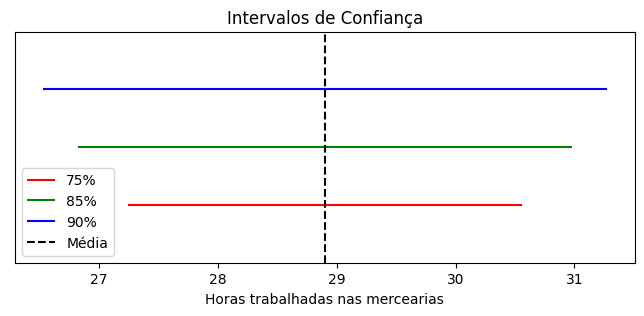

In [15]:
import matplotlib.pyplot as plt
# N√≠veis de confian√ßa
niveis = [0.75, 0.85, 0.90]
# Intervalo de confian√ßa para a m√©dia populacional
intervalos = [st.norm.interval(alpha=nivel, loc=x_barra, scale=sigma_x) for nivel in niveis]
# Exibi√ß√£o dos intervalos e constru√ß√£o gr√°fica
plt.figure(figsize=(8,3))
ALTURAS = [0.5, 1, 1.5]
CORES = ['r', 'g', 'b']
print('*** Intervalos de confican√ßa para a m√©dia populacional ***')
for i in range(len(niveis)):
  print(f'{niveis[i]*100}% --> ({intervalos[i][0]:.2f}, {intervalos[i][1]:.2f})')
  plt.hlines(ALTURAS[i], intervalos[i][0], intervalos[i][1], colors=CORES[i])
# Atributos do gr√°fico
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.ylim(0, 2)
plt.vlines(x_barra, 0, 2, colors='k', linestyles='dashed')
plt.title('Intervalos de Confian√ßa')
plt.xlabel('Horas trabalhadas nas mercearias')
plt.legend(['75%', '85%', '90%','M√©dia'], loc='lower left')
plt.show()

# Intervalo de confian√ßa para a m√©dia, com $\sigma$ desconhecido (populacional)

## Distribui√ß√£o T

Voc√™ seleciona aleatoriamente 16 cafeterias e mede a temperatura do caf√© vendido em cada uma delas. A temperatura m√©dia da amostra √© 162,0 ¬∫F com desvio padr√£o de 10,0 ¬∫F.

Construa os intervalos de confian√ßa de 90% e 99% para a temperatura
m√©dia da popula√ß√£o de caf√©s vendidos.

In [16]:
# N√≠veis de confian√ßa
niveis = [0.90, 0.99]
# Atributos da distribui√ß√£o
x_barra, std_amostral = 162, 10
num_amostras = 16
graus_liberdade = num_amostras - 1
# Intervalo de confian√ßa para a m√©dia populacional
intervalos = [st.t.interval(alpha=nivel, df=graus_liberdade, loc=x_barra,
                            scale=std_amostral/num_amostras**0.5) for nivel in niveis]
# Exibi√ß√£o dos intervalos
print('*** Intervalos de confican√ßa para a m√©dia populacional ***')
for i in range(len(niveis)):
  print(f'{niveis[i]*100}% --> ({intervalos[i][0]:.2f}, {intervalos[i][1]:.2f})')

*** Intervalos de confican√ßa para a m√©dia populacional ***
90.0% --> (157.62, 166.38)
99.0% --> (154.63, 169.37)


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7988\2139331453.py:8: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intervalos = [st.t.interval(alpha=nivel, df=graus_liberdade, loc=x_barra,


Considere o conjunto de dados a seguir (amostra de uma popula√ß√£o). Construa um intervalo de confian√ßa com 95% de confian√ßa que contenha a m√©dia poulacional. Assuma que a popula√ß√£o √© normalmente distribu√≠da.

*NOTA:* Para estimar o erro padr√£o da m√©dia ($s/\sqrt{n}$), use o m√©todo *sem* (standard error of the mean) do m√≥dulo *stats*.

In [17]:
import numpy as np
# Dados amostrais
amostras = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3,
            3, 4, 4, 5, 5, 5, 6, 7, 8, 10]
# N√≠vel de confian√ßa
nivel = 0.95
# Atributos da distribui√ß√£o
x_barra = np.mean(amostras)
erro_padrao = st.sem(amostras)
num_amostras = 20
graus_liberdade = num_amostras - 1
# Intervalo de confian√ßa
intervalo = st.t.interval(alpha=nivel, df=graus_liberdade,
                          loc=x_barra, scale=erro_padrao)
print(f'Intervalo de confian√ßa: ({intervalo[0]:.2f}, {intervalo[1]:.2f})')

Intervalo de confian√ßa: (2.76, 5.04)


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7988\533345881.py:13: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  intervalo = st.t.interval(alpha=nivel, df=graus_liberdade,


# A Distribui√ß√£o Chi-Quadrado
Se a vari√°vel aleat√≥ria $x$ tem uma distribui√ß√£o normal com desvio padr√£o $\sigma$, ent√£o

\begin{align}
        \chi^2=\frac{(n-1)s^2}{\sigma^2}
\end{align}

resulta em uma distribui√ß√£o qui-quadrado com $n ‚Äì 1$ graus de liberdade, para amostras de qualquer tamanho $n > 1$.

No Python, usaremos o m√©todo *pdf* *(probability density function)* da classe *stats.chi2* (biblioteca *scipy*).

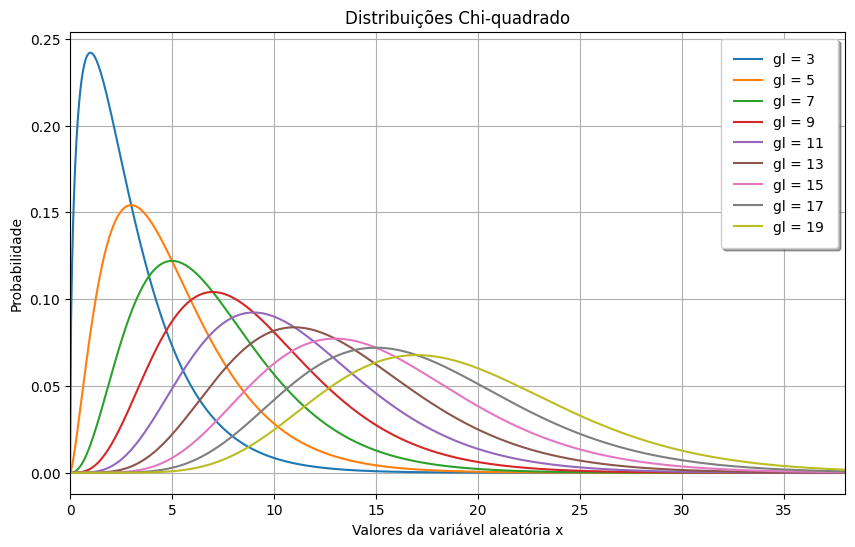

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
# Gera√ß√£o da lista de graus de liberdade para a visualiza√ß√£o (de 3 a 19)
gl = list(range(3, 21, 2))
# Gera√ß√£o de QUANT pontos no intervalo entre INICIO e FIM
QUANT, INICIO, FIM = 750, 0, max(gl)*2
# Tamanho da figura
plt.figure(figsize=(10, 6))
# Plotagem dos gr√°ficos
for grau in gl:
  # Determina√ß√£o da distribui√ß√£o chi-quadrado, com o correspondente gl
  chiquad = st.chi2(df=grau)
  x = np.linspace(INICIO, FIM, QUANT)
  # Determina√ß√£o da fun√ß√£o densidade de probabilidade
  y = chiquad.pdf(x)
  plt.plot(x, y, label='gl = '+ str(grau))
# Atributos do gr√°fico
plt.legend(frameon=True, fancybox=True, framealpha=1,
           shadow=True, borderpad=1)
plt.xlim(0, max(gl)*2)
plt.title('Distribui√ß√µes Chi-quadrado')
plt.xlabel('Valores da vari√°vel aleat√≥ria x')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()

Exerc√≠cio: Encontre os valores cr√≠ticos $\chi^2_R$
e $\chi^2_L$ para um intervalo de confian√ßa
de 95% quando o tamanho da amostra √© 18.

In [18]:
# Cria√ß√£o da distribui√ß√£o chi-quadrado com 17 grau de liberdade
AMOSTRAS = 18
distchi2 = st.chi2(df=AMOSTRAS-1)
# N√≠vel de confian√ßa
confianca = 0.95
# Determina√ß√£o dos valores cr√≠ticos
x2L = distchi2.ppf((1-confianca)/2)
x2R = distchi2.ppf((1+confianca)/2)
# Exibi√ß√£o dos valores
print(f'Valor cr√≠tico √† esquerda = {x2L:.3f}')
print(f'Valor cr√≠tico √† direita = {x2R:.3f}')

Valor cr√≠tico √† esquerda = 7.564
Valor cr√≠tico √† direita = 30.191


## Intervalos de Confian√ßa para $\sigma^2$ e $\sigma$

Voc√™ seleciona aleatoriamente e pesa as 30 unidades de uma amostra de um antial√©rgico. O desvio padr√£o da amostra √© de 1,20 miligrama. Supondo que os pesos s√£o normalmente distribu√≠dos, construa intervalos de confian√ßa de 90% e 95% para a vari√¢ncia e o desvio padr√£o da popula√ß√£o de pesos dos rem√©dios.

In [19]:
# Fun√ß√£o para o c√°lculo do IC
def intconf_variancia(amostras, confianca, s_amostral):
  # Distribui√ß√£o chi-quadrado
  distchi2 = st.chi2(df=amostras-1)
  # Determina√ß√£o dos valores cr√≠ticos
  x2L = distchi2.ppf((1-confianca)/2)
  x2R = distchi2.ppf((1+confianca)/2)
  # Extremos do IC para vari√¢ncia
  inf = (amostras-1)*s_amostral**2/x2R
  sup = (amostras-1)*s_amostral**2/x2L
  return (inf, sup)

# Intervalos de confian√ßa
amostras, confianca, desvpad = 30, [0.95, 0.90], 1.20
# Lista de intervalos de confian√ßa
ICsigma2 = [intconf_variancia(amostras, conf, desvpad) for conf in confianca]
# Exibi√ß√£o dos IC para vari√¢ncia e desvio padr√£o
for i in range(len(confianca)):
  print(f'- N√≠vel de confian√ßa de {confianca[i]*100}%:')
  print(f'Vari√¢ncia: ({ICsigma2[i][0]:.3f}, {ICsigma2[i][1]:.3f})')
  print(f'Desvio Padr√£o: ({ICsigma2[i][0]**0.5:.3f}, {ICsigma2[i][1]**0.5:.3f})')

- N√≠vel de confian√ßa de 95.0%:
Vari√¢ncia: (0.913, 2.602)
Desvio Padr√£o: (0.956, 1.613)
- N√≠vel de confian√ßa de 90.0%:
Vari√¢ncia: (0.981, 2.358)
Desvio Padr√£o: (0.991, 1.536)


**Exerc√≠cio:** O puma √© um dos mam√≠feros mais amea√ßados da Terra. No sudeste dos Estados Unidos, a √∫nica popula√ß√£o reprodutora (cerca de 100 indiv√≠duos) pode ser encontrada no extremo sul da Fl√≥rida. A maioria dos pumas vive em:

1.   The Big Cypress National Preserve
2.   Everglades National Park
3.   The Florida Panther National Wildlife Refuge,

conforme o mapa na figura a seguir.

<img src="https://cdn.discordapp.com/attachments/653700320953761794/1029876222332772443/unknown.png" alt="mapa" >

Em um estudo recente com 12 f√™meas da esp√©cie, foi descoberto que o tamanho m√©dio da ninhada era de 2,4 filhotes, com um desvio padr√£o de 0,9 (Fonte: *U.S. Fish & Wildlife Service*).

Construa um intervalo de confian√ßa de 90% para o desvio
padr√£o do tamanho da ninhada das f√™meas do puma na Fl√≥rida. Suponha que os tamanhos das ninhadas s√£o normalmente distribu√≠dos.

In [20]:
# Caracteriza√ß√£o da amostra
amostras = 12
confianca = 0.9
desv_pad = 0.9
# Uso da fun√ß√£o para c√°lculo de IC para a vari√¢ncia
ICsigma2 = intconf_variancia(amostras, confianca, desv_pad)
# C√°lculo do IC para o desvio padr√£o
print(f'IC para o desvio padr√£o, confian√ßa de {confianca*100}%:')
print(f'({ICsigma2[0]**0.5:.3f}, {ICsigma2[1]**0.5:.3f})')

IC para o desvio padr√£o, confian√ßa de 90.0%:
(0.673, 1.396)
